In [2]:
import numpy as np
import loompy
import numpy as np
import pandas as pd
import scanpy as sc
import scipy as sp
import matplotlib.pyplot as plt
import glob
import bbknn
import seaborn as sns
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))
%matplotlib inline
from pandas.core.index import RangeIndex

import scvelo as scv
scv.logging.print_version()

Running scvelo 0.2.1 (python 3.7.6) on 2020-08-04 11:14.
 Your version: 		 0.2.1 
 Latest version: 	 0.2.2


In [3]:
sc.logging.print_versions()

scanpy==1.5.1 anndata==0.7.4 umap==0.4.6 numpy==1.18.5 scipy==1.5.0 pandas==1.0.5 scikit-learn==0.23.1 statsmodels==0.11.1 python-igraph==0.8.2 leidenalg==0.8.1


In [2]:
sc.settings.set_figure_params(dpi=140)

In [157]:
###VELOCITY AnLYSIS###

In [158]:
import scvelo as scv
scv.logging.print_version()

Running scvelo 0.2.1 (python 3.7.6) on 2020-07-30 16:49.
 Your version: 		 0.2.1 
 Latest version: 	 0.2.2


In [159]:
scv.settings.verbosity = 3  # show errors(0), warnings(1), info(2), hints(3)
scv.settings.presenter_view = True  # set max width size for presenter view
scv.set_figure_params('scvelo')  # for beautified visualization

In [160]:
adata_subset

AnnData object with n_obs × n_vars = 1867 × 3430
    obs: 'Clusters', '_X', '_Y', 'Time', 'n_genes', 'percent_mito', 'n_counts', 'leiden'
    var: 'Accession', 'Chromosome', 'End', 'Start', 'Strand', 'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean', 'std'
    uns: 'log1p', 'pca', 'neighbors', 'umap', 'leiden', 'leiden_colors', 'Time_colors', 'rank_genes_groups', 'smo_up'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    layers: 'matrix', 'ambiguous', 'spliced', 'unspliced'
    obsp: 'distances', 'connectivities'

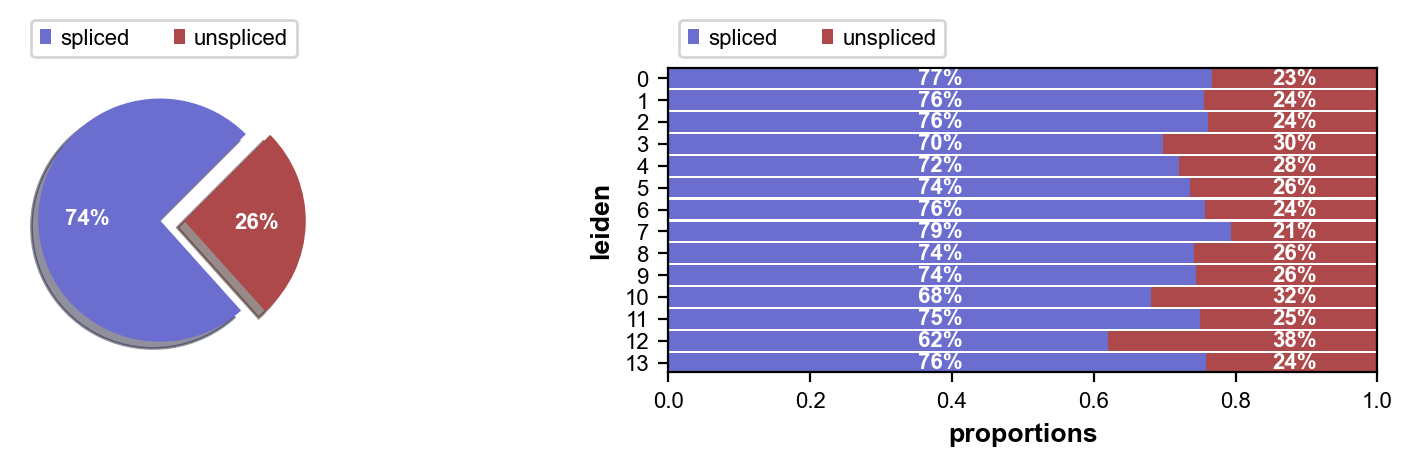

In [161]:
scv.pl.proportions(adata_subset, groupby='leiden')

In [162]:
scv.pp.filter_and_normalize(adata_subset, min_shared_counts=20, n_top_genes=2000)
scv.pp.moments(adata_subset, n_pcs=30, n_neighbors=30)

Filtered out 2106 genes that are detected 20 counts (shared).
Normalized count data: spliced, unspliced.
Skip filtering by dispersion since number of variables are less than `n_top_genes`
computing neighbors
    finished (0:00:00) --> added 
    'distances' and 'connectivities', weighted adjacency matrices (adata.obsp)
computing moments based on connectivities
    finished (0:00:00) --> added 
    'Ms' and 'Mu', moments of spliced/unspliced abundances (adata.layers)


In [163]:
scv.tl.velocity(adata_subset, mode='stochastic')
#mode: `'steady_state'`, `'deterministic'`, `'stochastic'` or `'dynamical'` (default: `'stochastic'`)

computing velocities
    finished (0:00:00) --> added 
    'velocity', velocity vectors for each individual cell (adata.layers)


In [164]:
scv.tl.velocity_graph(adata_subset)


computing velocity graph
    finished (0:00:01) --> added 
    'velocity_graph', sparse matrix with cosine correlations (adata.uns)


computing velocity embedding
    finished (0:00:00) --> added
    'velocity_umap', embedded velocity vectors (adata.obsm)


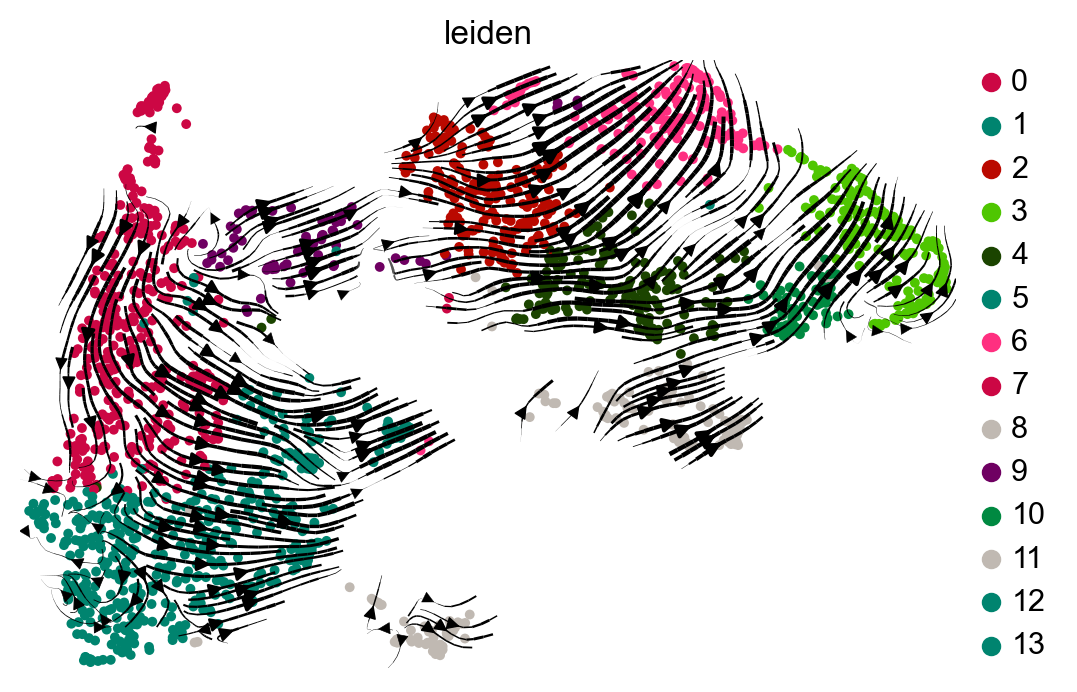

In [165]:
scv.pl.velocity_embedding_stream(adata_subset, basis='umap', color=['leiden'],
                                density=1.5, size=50, alpha=1, legend_loc='right margin')

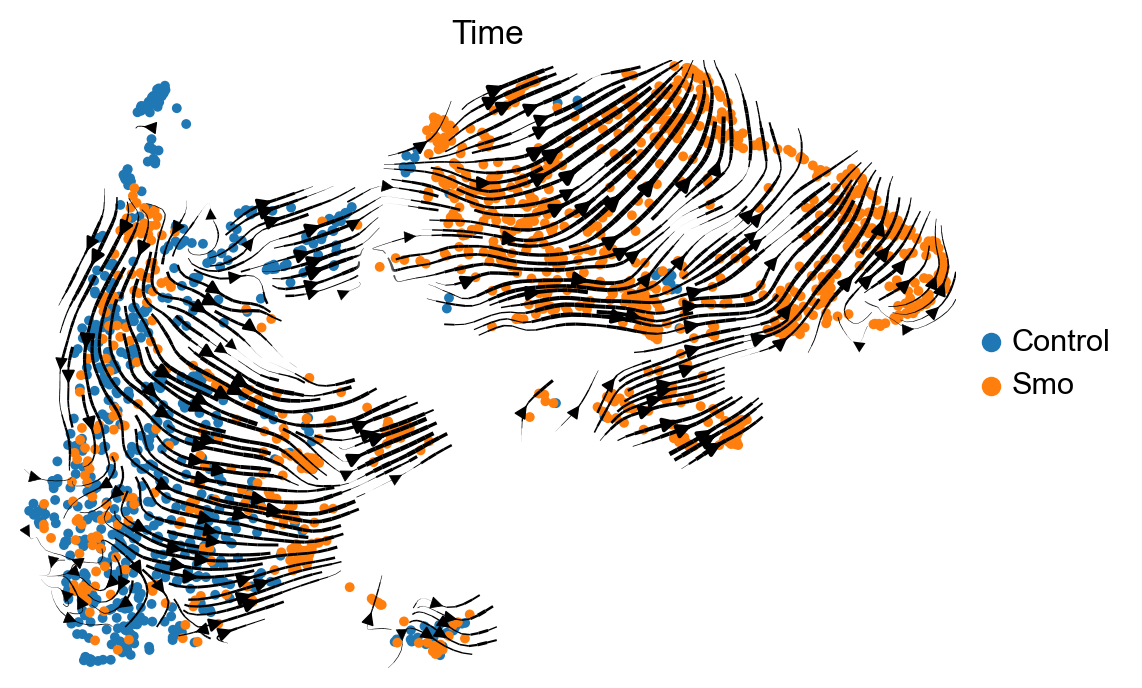

In [196]:
scv.pl.velocity_embedding_stream(adata_subset, basis='umap', color=['Time'],
                                density=1.5, size=50, alpha=1, legend_loc='right margin')

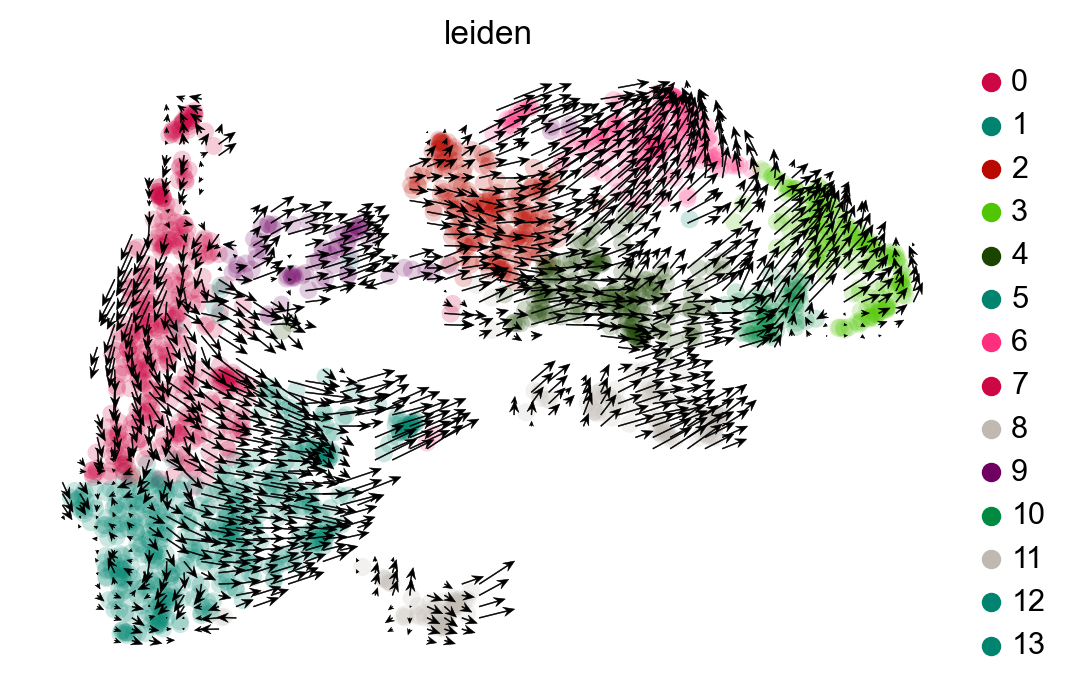

In [173]:
scv.pl.velocity_embedding_grid(adata_subset, basis='umap', vkey='velocity', color='leiden',
                              legend_loc='right margin', arrow_size=2,
                              arrow_length=5, arrow_color='black')

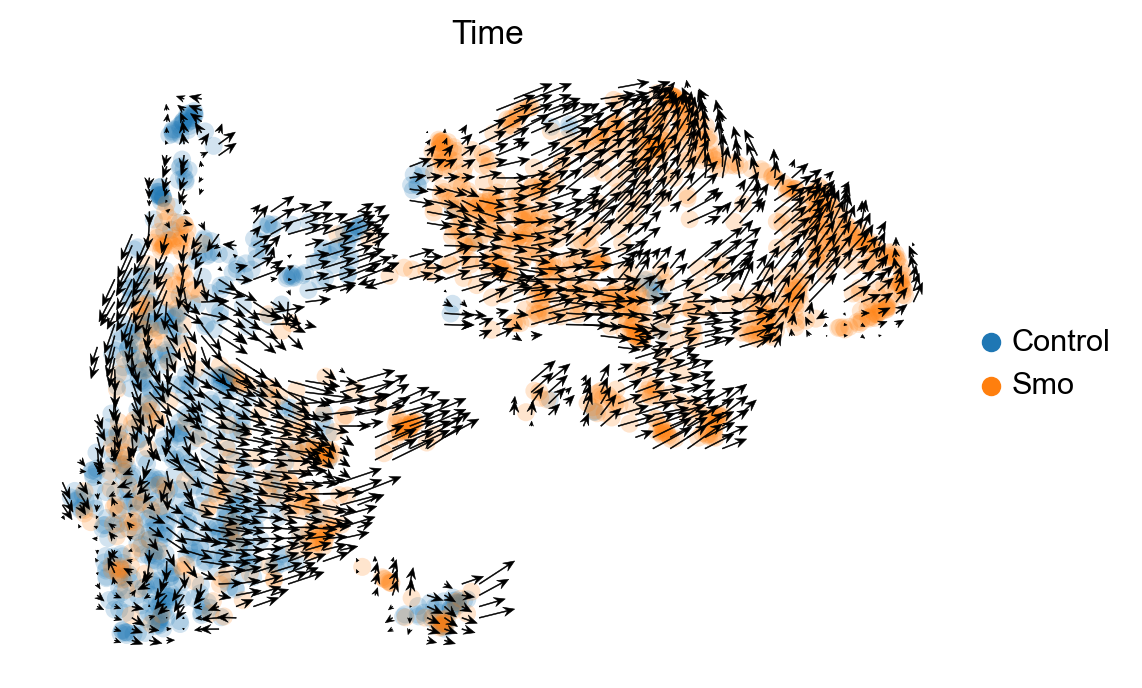

In [167]:
scv.pl.velocity_embedding_grid(adata_subset, basis='umap', vkey='velocity', color='Time',
                              legend_loc='right margin', arrow_size=2,
                              arrow_length=5, arrow_color='black')

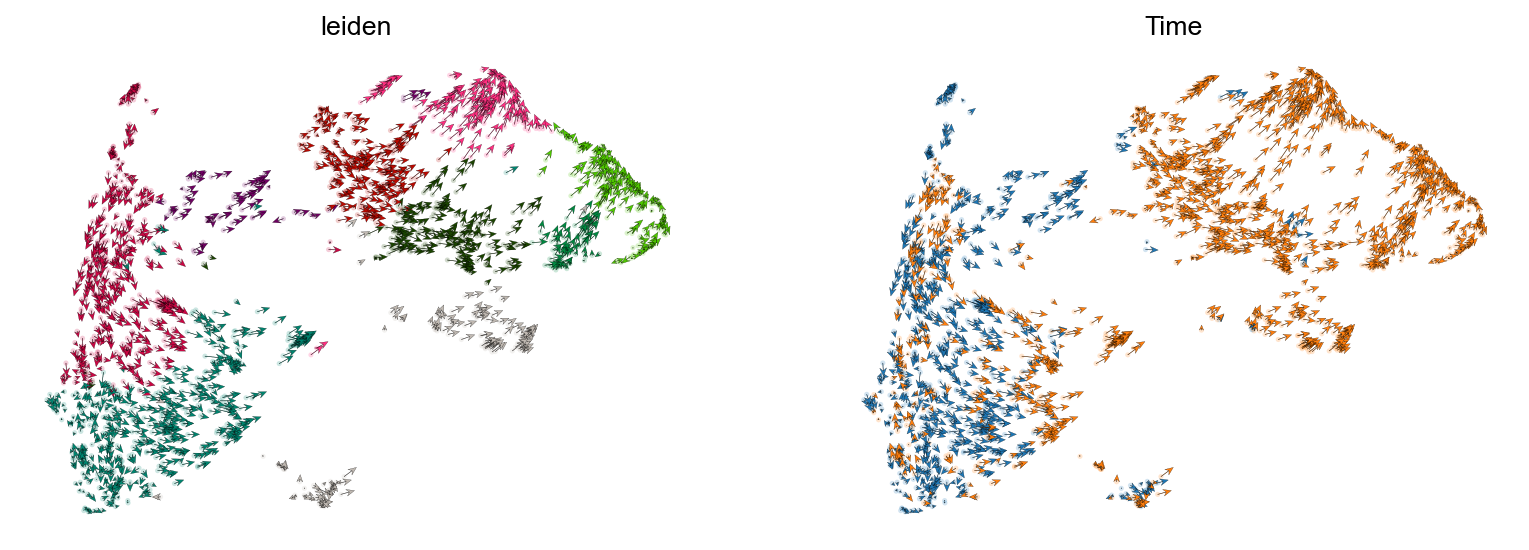

In [210]:
scv.pl.velocity_embedding(adata_subset, arrow_length=3, arrow_size=2, dpi=120, color=['leiden','Time'])

In [221]:
scv.tl.rank_velocity_genes(adata_subset, groupby='leiden', min_corr=.3, n_genes=1000)

df = scv.DataFrame(adata_subset.uns['rank_velocity_genes']['names'])
df.head(20)

ranking velocity genes
    finished (0:00:00) --> added 
    'rank_velocity_genes', sorted scores by group ids (adata.uns) 
    'spearmans_score', spearmans correlation scores (adata.var)


,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,Iigp1,Pappa,Tenm2,Pde3a,Rasgrp2,Prr5l,Myo1e,Esr1,Ngf,Ezr,Ppfibp2,Plcxd2,Gm26917,Gm47283
1,Ncam1,Runx1t1,Cd55,Id3,Hoxa9,Prdm1,Myo10,Plce1,Pdzd2,Fgf1,Zeb2,Diaph3,Ptk7,Gm15247
2,Il1rl1,Pdgfd,Tmem100,Basp1,Slit2,Errfi1,Piezo1,Heg1,Rasgrp2,Ncald,Ndst3,Top2a,Slc7a5,Ece1
3,Fbn2,Nav3,Lgr4,CT025619.1,Col26a1,Kitl,Ugdh,Tshz2,Fosb,Cttnbp2,Lgals3,Lin7a,Itgbl1,Tgfb2
4,Abi3bp,Mylk,Efr3b,Flt1,Lgals9,Pou2f2,Timp3,Nfib,Noct,Efr3b,Inpp4b,Nav3,Bpgm,Rorb
5,Esr1,Sh3rf1,Cd34,Col4a2,Pdzd2,Bpgm,Arhgap31,Mmp2,Bpgm,Thy1,Unc5b,Prss35,Hbegf,Errfi1
6,Ccnb1ip1,Ank3,Ldb2,Eaf1,Frmd4b,Mmp11,Gm47283,Nox4,Dapk1,Plce1,Pdgfrb,Cpe,Runx3,Sema7a
7,Gpm6b,Sema5a,Pdzd2,Piezo1,Cd55,Entpd1,Col4a1,Gas7,Ntng1,Gas7,Ncald,Mmp11,Vcam1,Spry2
8,C1s1,Ncam1,Tek,Col4a1,Fmnl2,Hbegf,Plpp3,Dapk1,Inpp4b,Meox2,Itga8,Pappa,Prr5l,Cd44
9,Sema5a,Daam2,Hes1,Col23a1,Akap12,Ank3,Sema7a,Hpgd,Col26a1,Tmem100,Mgll,Bcl11b,2900026A02Rik,Zfp948


In [175]:
### GETTING ALL OF THE GENES ####